In [1]:
## import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
import eda_helper_functions

In [3]:
from sklearn.ensemble import IsolationForest

In [4]:
file_path=r"C:\Users\sneha\OneDrive\Desktop\flight-sagemake-project\data\train.csv"
train=pd.read_csv(file_path)
train

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Jet Airways,2019-06-21,Mumbai,Hyderabad,10:20:00,11:50:00,90,0.0,In-flight meal not included,4995
1,Air India,2019-05-18,Delhi,Cochin,09:00:00,07:40:00,1360,1.0,No Info,8372
2,Air India,2019-06-12,Kolkata,Banglore,09:10:00,11:05:00,1555,2.0,No Info,6117
3,Vistara,2019-04-01,Kolkata,Banglore,20:20:00,22:55:00,1595,1.0,No Info,7770
4,Vistara,2019-06-06,Kolkata,Banglore,17:00:00,10:45:00,1065,1.0,No Info,9187
...,...,...,...,...,...,...,...,...,...,...
635,Air Asia,2019-04-12,Banglore,Delhi,04:55:00,07:45:00,170,0.0,No Info,4282
636,Jet Airways,2019-05-09,Kolkata,Banglore,09:35:00,21:05:00,690,1.0,No Info,13067
637,Indigo,2019-05-15,Banglore,Delhi,06:05:00,08:50:00,165,0.0,No Info,4423
638,Multiple Carriers,2019-05-15,Delhi,Cochin,08:45:00,21:00:00,735,1.0,No Info,7670


In [5]:
train.dtypes

airline                str
date_of_journey        str
source                 str
destination            str
dep_time               str
arrival_time           str
duration             int64
total_stops        float64
additional_info        str
price                int64
dtype: object

In [6]:
train=train.assign(**{
    col: pd.to_datetime(train.loc[:,col],dayfirst=True,format="mixed")
    for col in ["date_of_journey","dep_time","arrival_time"]                    
})

In [7]:
train.dtypes

airline                       str
date_of_journey    datetime64[us]
source                        str
destination                   str
dep_time           datetime64[us]
arrival_time       datetime64[us]
duration                    int64
total_stops               float64
additional_info               str
price                       int64
dtype: object

In [8]:
train

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Jet Airways,2019-06-21,Mumbai,Hyderabad,2026-02-24 10:20:00,2026-02-24 11:50:00,90,0.0,In-flight meal not included,4995
1,Air India,2019-05-18,Delhi,Cochin,2026-02-24 09:00:00,2026-02-24 07:40:00,1360,1.0,No Info,8372
2,Air India,2019-12-06,Kolkata,Banglore,2026-02-24 09:10:00,2026-02-24 11:05:00,1555,2.0,No Info,6117
3,Vistara,2019-01-04,Kolkata,Banglore,2026-02-24 20:20:00,2026-02-24 22:55:00,1595,1.0,No Info,7770
4,Vistara,2019-06-06,Kolkata,Banglore,2026-02-24 17:00:00,2026-02-24 10:45:00,1065,1.0,No Info,9187
...,...,...,...,...,...,...,...,...,...,...
635,Air Asia,2019-12-04,Banglore,Delhi,2026-02-24 04:55:00,2026-02-24 07:45:00,170,0.0,No Info,4282
636,Jet Airways,2019-09-05,Kolkata,Banglore,2026-02-24 09:35:00,2026-02-24 21:05:00,690,1.0,No Info,13067
637,Indigo,2019-05-15,Banglore,Delhi,2026-02-24 06:05:00,2026-02-24 08:50:00,165,0.0,No Info,4423
638,Multiple Carriers,2019-05-15,Delhi,Cochin,2026-02-24 08:45:00,2026-02-24 21:00:00,735,1.0,No Info,7670


## High level Summary of Data

In [9]:
train.info()

<class 'pandas.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   airline          640 non-null    str           
 1   date_of_journey  640 non-null    datetime64[us]
 2   source           640 non-null    str           
 3   destination      640 non-null    str           
 4   dep_time         640 non-null    datetime64[us]
 5   arrival_time     640 non-null    datetime64[us]
 6   duration         640 non-null    int64         
 7   total_stops      640 non-null    float64       
 8   additional_info  640 non-null    str           
 9   price            640 non-null    int64         
dtypes: datetime64[us](3), float64(1), int64(2), str(4)
memory usage: 50.1 KB


In [10]:
train.describe(include="number")

,duration,total_stops,price
count,640.000000,640.000000,640.000000
mean,639.773438,0.792188,9075.418750
std,502.047906,0.654060,4328.022872
min,75.000000,0.000000,1965.000000
25%,175.000000,0.000000,5636.250000
50%,505.000000,1.000000,8372.000000
75%,956.250000,1.000000,12386.750000
max,2565.000000,3.000000,34273.000000


In [11]:
(
    train
    .assign(total_stops=train["total_stops"].astype(object))
    .describe(include="O")
)

C:\Users\sneha\AppData\Local\Temp\ipykernel_30696\441852268.py:4: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  .describe(include="O")


,airline,source,destination,total_stops,additional_info
count,640,640,640,640.0,640
unique,8,5,6,4.0,4
top,Jet Airways,Delhi,Cochin,1.0,No Info
freq,248,263,263,351.0,488


## High level analysis of MIssing Values

In [12]:
eda_helper_functions.missing_info(train)

,count,percentage
variable,,


## High Level Analysis of Outliers

In [13]:
forest=IsolationForest(n_estimators=10,random_state=42)


In [14]:
(
    train
    .assign(outlier=forest.fit_predict(
        train
        .drop(columns="price")
        .select_dtypes(include="number")
    ))
    .query("outlier==-1")
)

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price,outlier
0,Jet Airways,2019-06-21,Mumbai,Hyderabad,2026-02-24 10:20:00,2026-02-24 11:50:00,90,0.0,In-flight meal not included,4995,-1
1,Air India,2019-05-18,Delhi,Cochin,2026-02-24 09:00:00,2026-02-24 07:40:00,1360,1.0,No Info,8372,-1
2,Air India,2019-12-06,Kolkata,Banglore,2026-02-24 09:10:00,2026-02-24 11:05:00,1555,2.0,No Info,6117,-1
3,Vistara,2019-01-04,Kolkata,Banglore,2026-02-24 20:20:00,2026-02-24 22:55:00,1595,1.0,No Info,7770,-1
4,Vistara,2019-06-06,Kolkata,Banglore,2026-02-24 17:00:00,2026-02-24 10:45:00,1065,1.0,No Info,9187,-1
...,...,...,...,...,...,...,...,...,...,...,...
626,Spicejet,2019-09-05,Mumbai,Hyderabad,2026-02-24 05:45:00,2026-02-24 07:15:00,90,0.0,No check-in baggage included,1965,-1
627,Air India,2019-03-21,Delhi,Cochin,2026-02-24 19:45:00,2026-02-24 19:15:00,1410,2.0,No Info,8236,-1
630,Air India,2019-12-05,Kolkata,Banglore,2026-02-24 10:00:00,2026-02-24 01:20:00,920,2.0,No Info,13243,-1
632,Jet Airways,2019-03-24,Kolkata,Banglore,2026-02-24 21:10:00,2026-02-24 22:35:00,1525,1.0,In-flight meal not included,10031,-1


## Pair plot

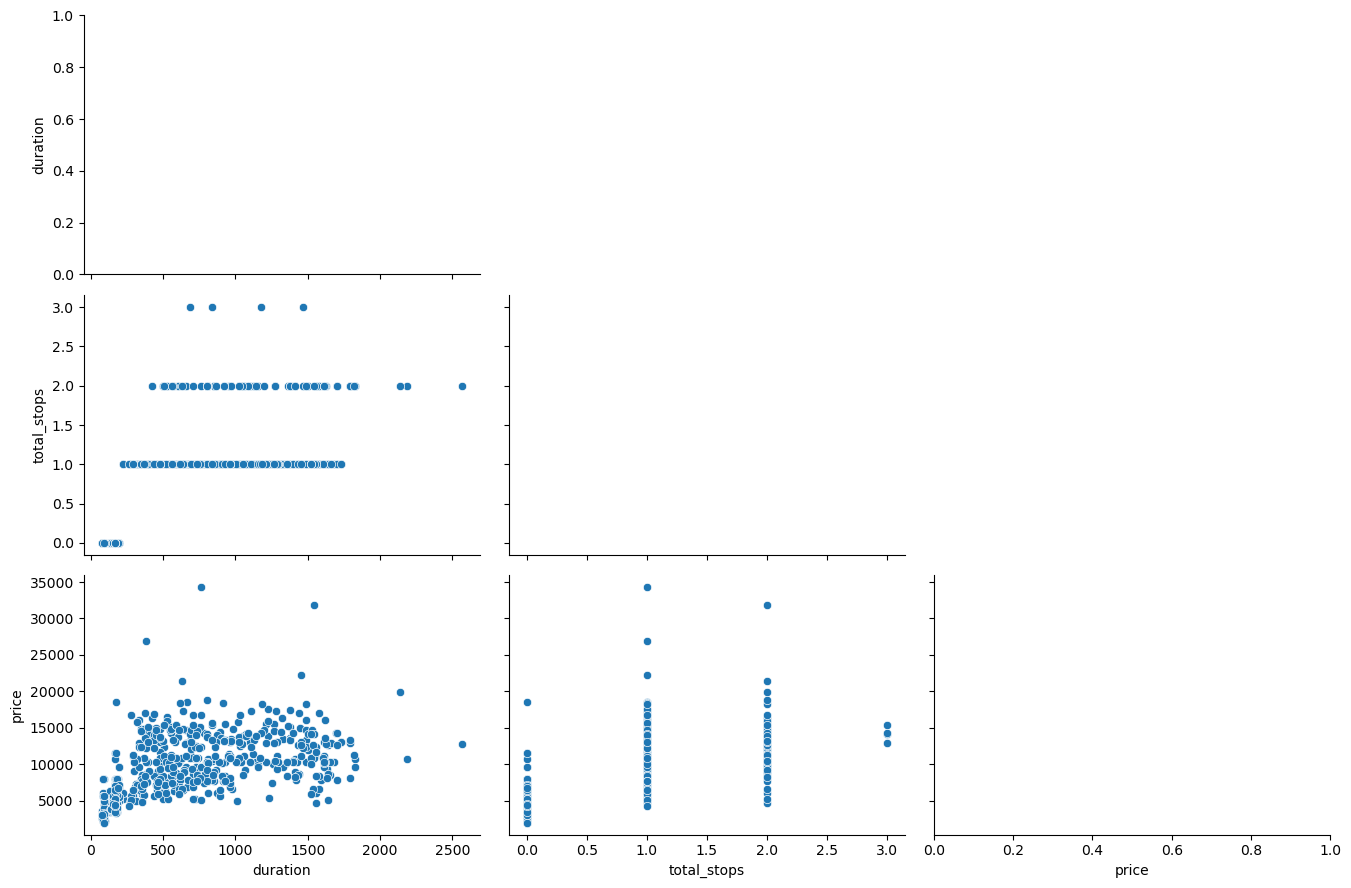

In [15]:
eda_helper_functions.pair_plots(train)

## Correlation Analysis

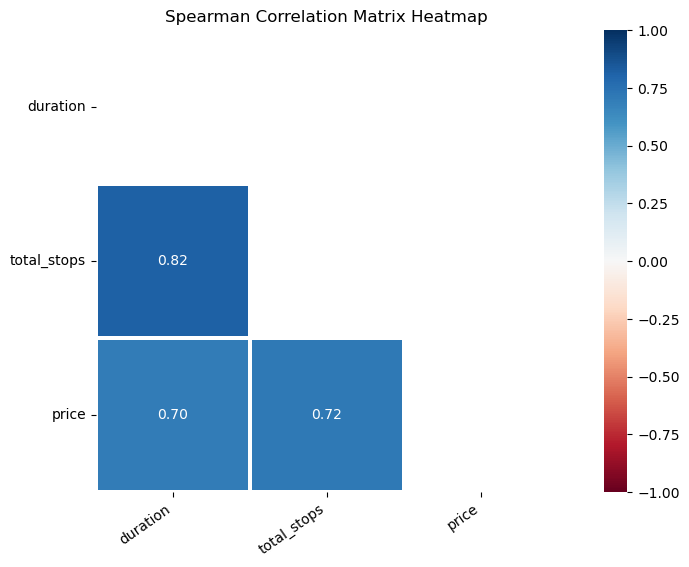

In [16]:
eda_helper_functions.correlation_heatmap(train)

In [17]:
train.corr(method="spearman",numeric_only=True)

,duration,total_stops,price
duration,1.000000,0.816527,0.702017
total_stops,0.816527,1.000000,0.715720
price,0.702017,0.715720,1.000000


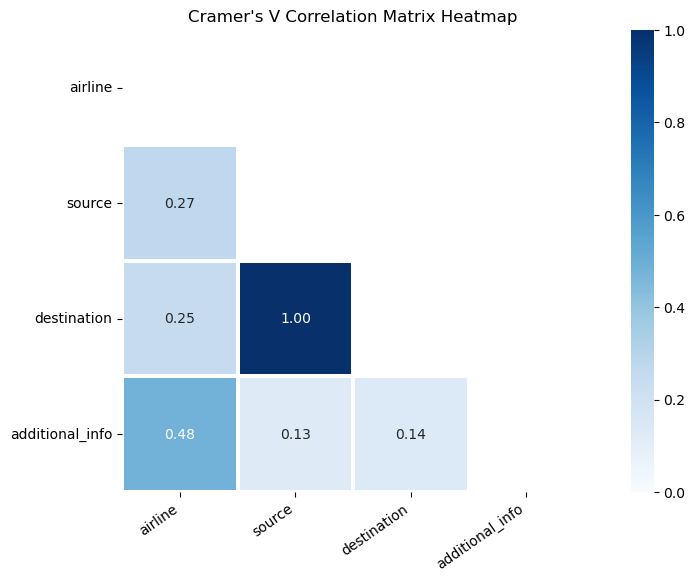

In [18]:
eda_helper_functions.cramersV_heatmap(train)

## Detailed Analysis

In [19]:
train.columns

Index(['airline', 'date_of_journey', 'source', 'destination', 'dep_time',
       'arrival_time', 'duration', 'total_stops', 'additional_info', 'price'],
      dtype='str')

In [20]:
train.airline

0            Jet Airways
1              Air India
2              Air India
3                Vistara
4                Vistara
             ...        
635             Air Asia
636          Jet Airways
637               Indigo
638    Multiple Carriers
639          Jet Airways
Name: airline, Length: 640, dtype: str

In [21]:
eda_helper_functions.cat_summary(train,"airline")

0            Jet Airways
1              Air India
2              Air India
3                Vistara
4                Vistara
             ...        
635             Air Asia
636          Jet Airways
637               Indigo
638    Multiple Carriers
639          Jet Airways
Name: airline, Length: 640, dtype: str

Data Type      : str
Cardinality    : 8 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 640 / 640 rows


,
count,640
unique,8
top,Jet Airways
freq,248


,count,percentage
category,,
Jet Airways,248,0.387500
Indigo,115,0.179688
Air India,102,0.159375
Multiple Carriers,68,0.106250
Spicejet,40,0.062500
Vistara,36,0.056250
Air Asia,18,0.028125
Goair,13,0.020313


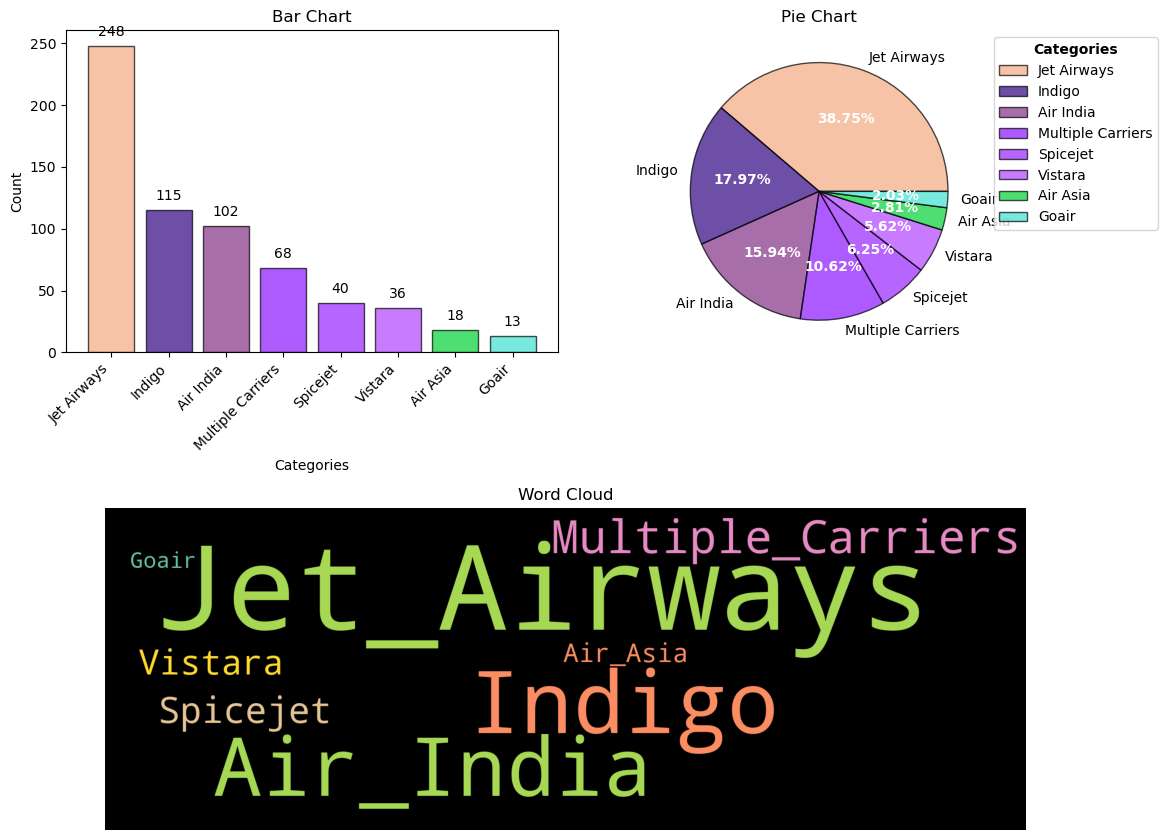

In [22]:
eda_helper_functions.cat_univar_plots(train,"airline")

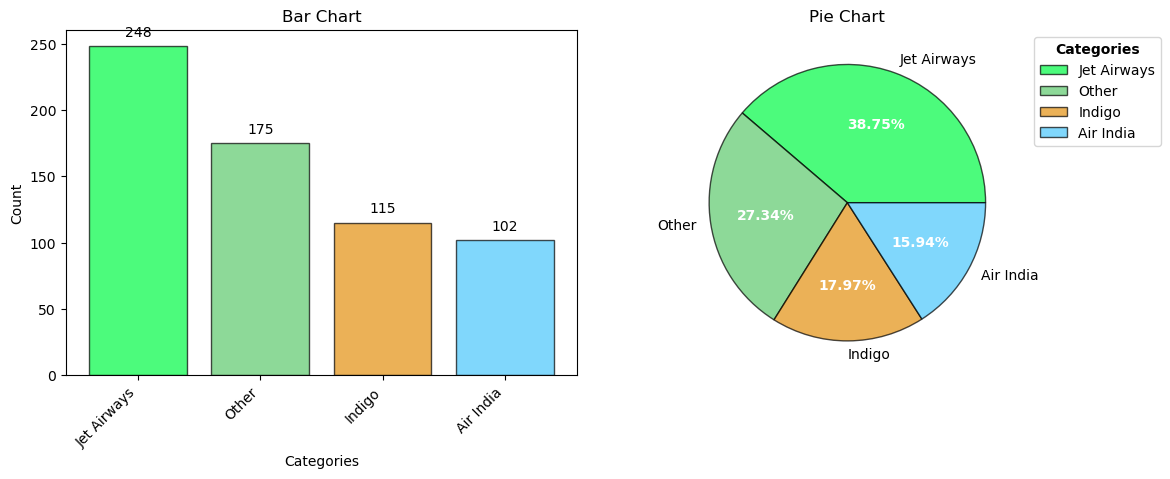

In [23]:
eda_helper_functions.cat_univar_plots(train,"airline",show_wordcloud=False,k=3)

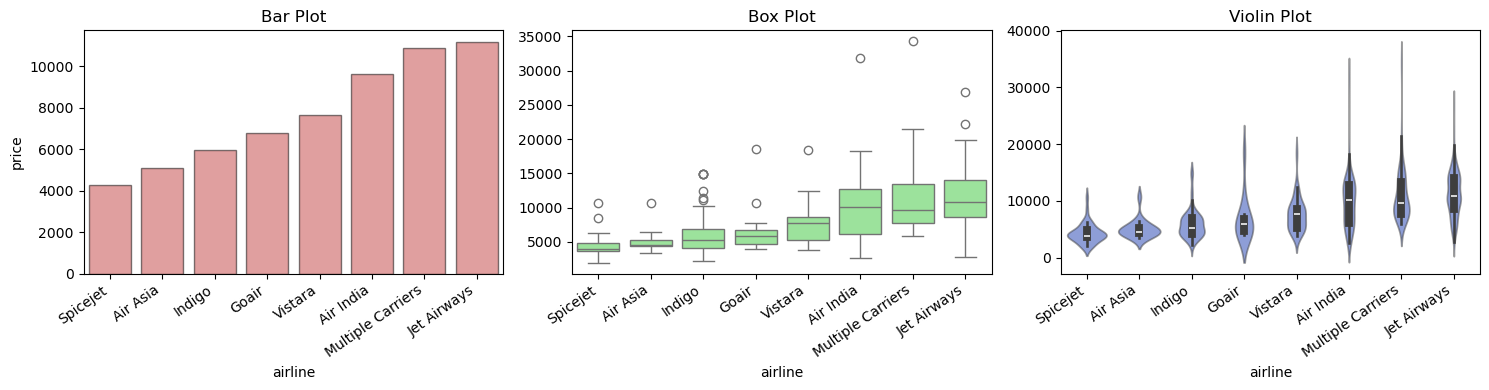

In [24]:
eda_helper_functions.num_cat_bivar_plots(
    data=train,
    num_var="price",
    cat_var="airline"
)

In [25]:
eda_helper_functions.num_cat_hyp_testing(train,"price","airline")

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 42.46553777098078
- p-value              : 3.970400260467945e-49
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 247.4640193359857
- p-value              : 9.600459786744093e-50
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


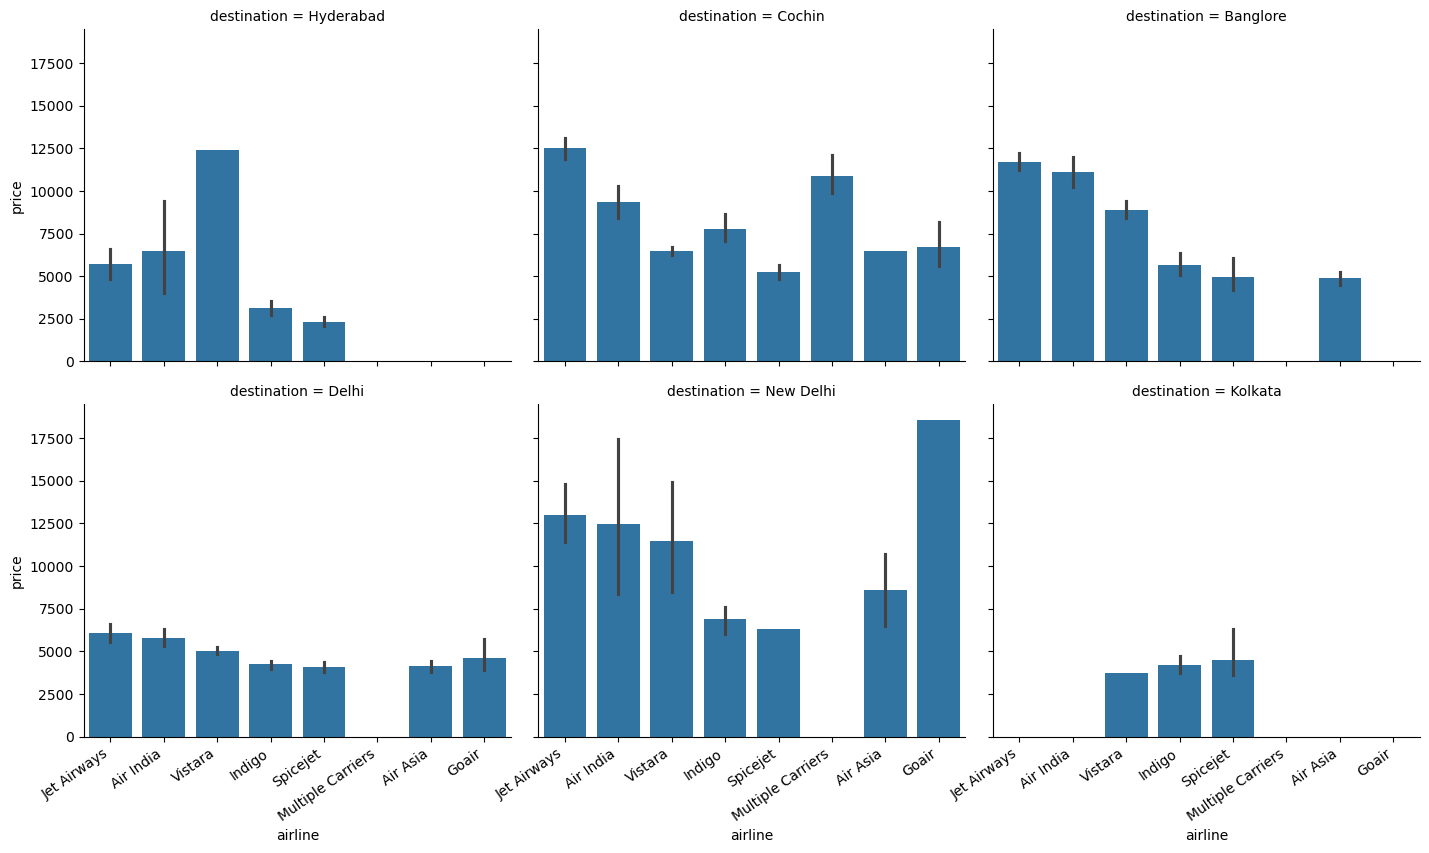

In [26]:
airline_grid=sns.FacetGrid(
     data=train,
     col="destination",
     col_wrap=3,
     height=4,
     aspect=1.2,
     sharey=True   
 )

airline_grid.map(sns.barplot,"airline","price",order=train.airline.unique())
for ax in airline_grid.axes[3:]:
    eda_helper_functions.rotate_xlabels(ax)

## Date of Journey

#### 

In [27]:
train.date_of_journey

0     2019-06-21
1     2019-05-18
2     2019-12-06
3     2019-01-04
4     2019-06-06
         ...    
635   2019-12-04
636   2019-09-05
637   2019-05-15
638   2019-05-15
639   2019-05-21
Name: date_of_journey, Length: 640, dtype: datetime64[us]

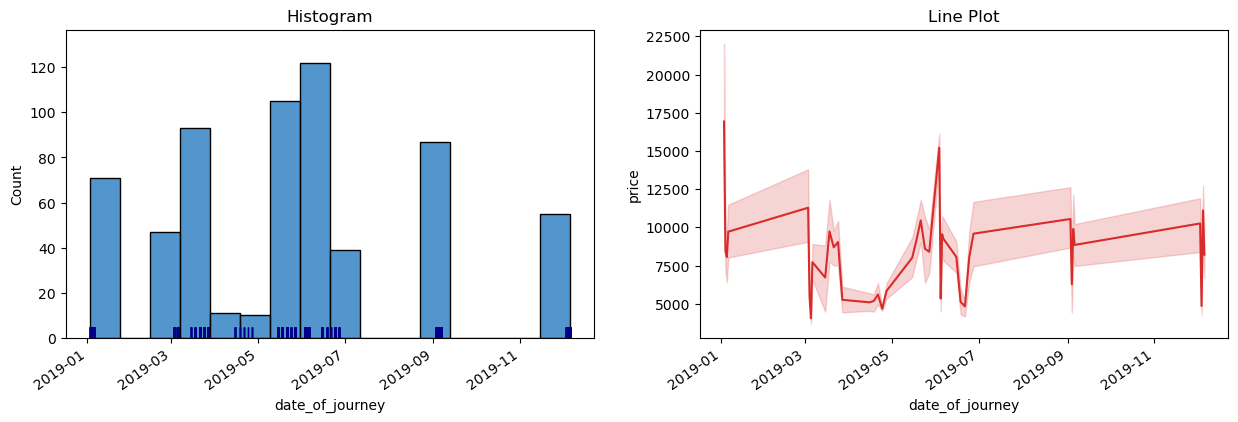

In [28]:
eda_helper_functions.dt_univar_plots(
    data=train,
    var="date_of_journey",
    target="price"
)

In [30]:
train["date_of_journey"].dt.to_period("M").value_counts().sort_index()

date_of_journey
2019-01     71
2019-03    140
2019-04     21
2019-05    105
2019-06    161
2019-09     87
2019-12     55
Freq: M, Name: count, dtype: int64

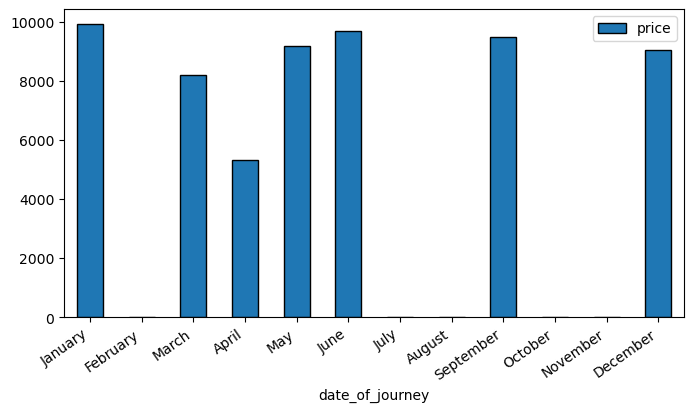

In [34]:
(
    train
    .groupby(pd.Grouper(key="date_of_journey", freq="ME"))
    .price.mean()
    .to_frame()
    .rename(index=lambda x: x.strftime("%B"))
    .plot(kind="bar", figsize=(8,4), edgecolor="black")
)
    
ax=plt.gca()
eda_helper_functions.rotate_xlabels(ax)

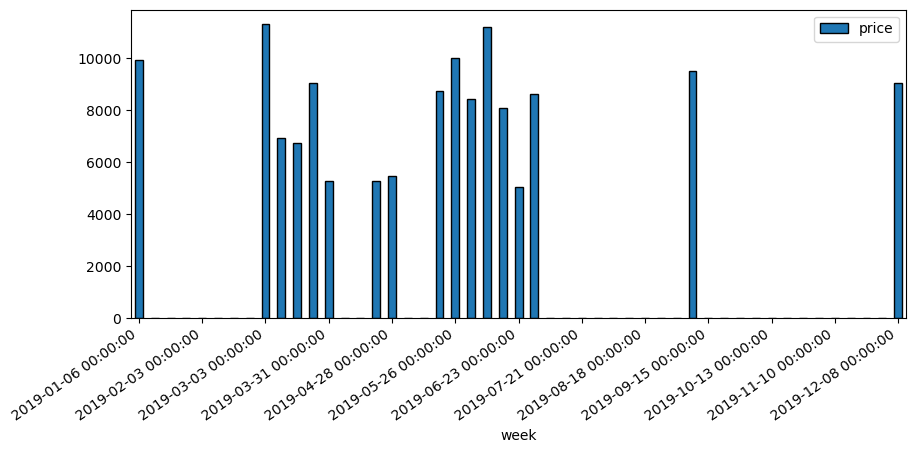

In [37]:
(
    train
    .groupby(pd.Grouper(key="date_of_journey", freq="W"))
    .price.mean()
    .to_frame()
    .rename_axis(index="week")
    .plot(figsize=(10,4),kind="bar",edgecolor="black")
)

ax = plt.gca()
ax.set_xticks(ax.get_xticks()[::4])
eda_helper_functions.rotate_xlabels(ax)




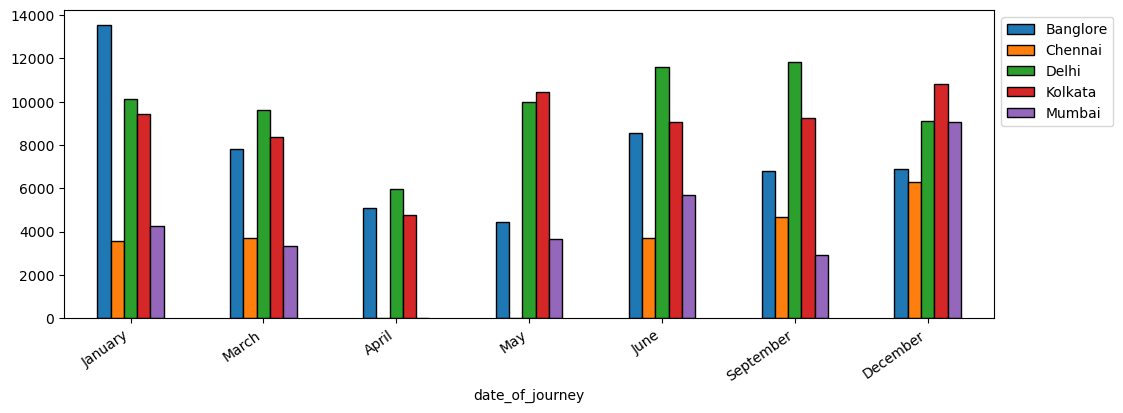

In [41]:
(
    train
    .groupby([pd.Grouper(key="date_of_journey",freq="ME"),"source"])
    .price.mean()
    .unstack(fill_value=0)
    .rename(index=lambda x: x.strftime("%B"))
    .plot(
        kind="bar",
        figsize=(12,4),
        edgecolor="black"
    )
)
ax=plt.gca()
ax.legend(
    loc="upper left",
    bbox_to_anchor=(1,1)
)
eda_helper_functions.rotate_xlabels(ax)

## Dep_time

In [42]:
train.dep_time

0     2026-02-24 10:20:00
1     2026-02-24 09:00:00
2     2026-02-24 09:10:00
3     2026-02-24 20:20:00
4     2026-02-24 17:00:00
              ...        
635   2026-02-24 04:55:00
636   2026-02-24 09:35:00
637   2026-02-24 06:05:00
638   2026-02-24 08:45:00
639   2026-02-24 20:00:00
Name: dep_time, Length: 640, dtype: datetime64[us]

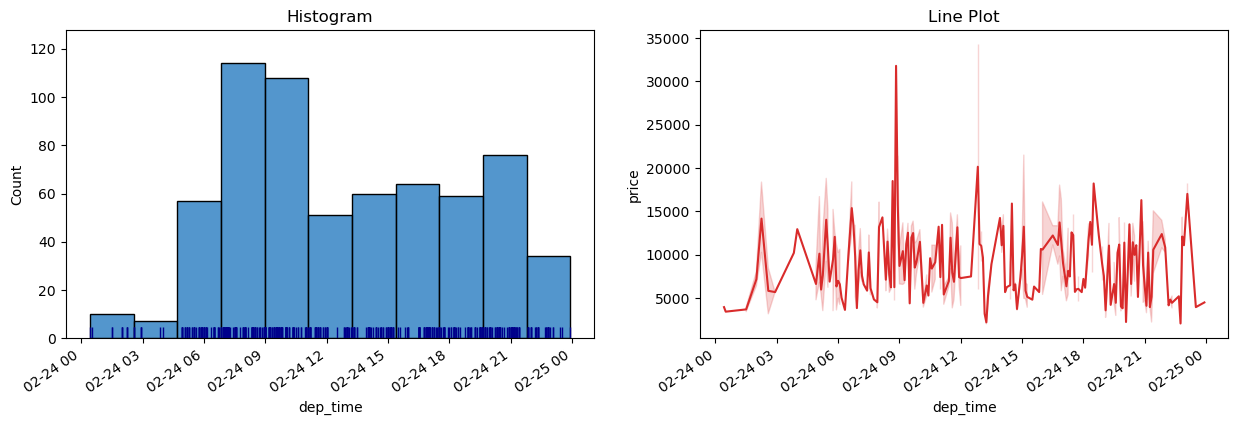

In [43]:
eda_helper_functions.dt_univar_plots(train,"dep_time","price")

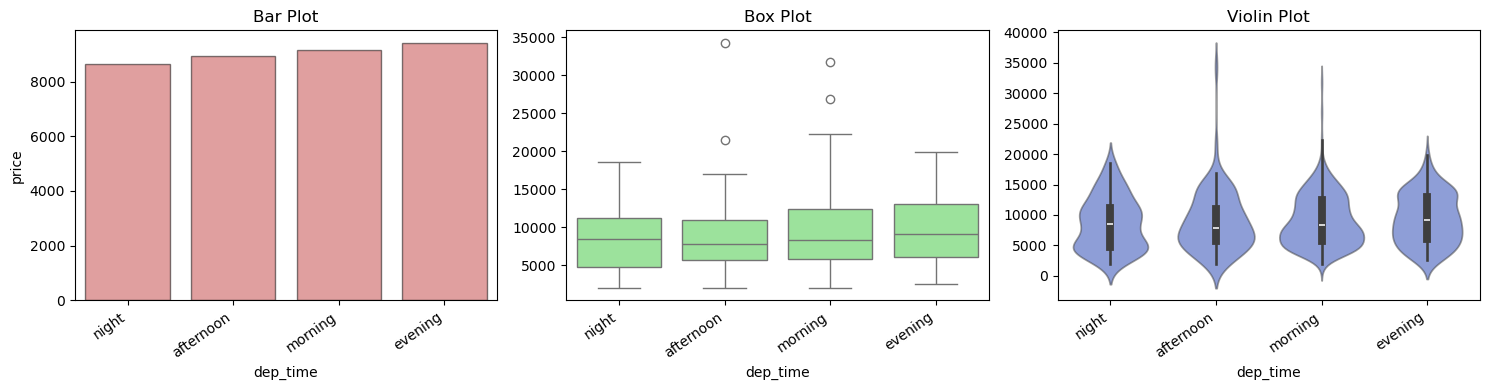

In [44]:
(
    train
    .assign(dep_time=lambda df_:(
        np.select([df_.dep_time.dt.hour.between(4,12,inclusive="left"),
                  df_.dep_time.dt.hour.between(12,16,inclusive="left"),
                  df_.dep_time.dt.hour.between(16,20,inclusive="left")],
                  ["morning","afternoon","evening"],
                  default="night")
        
    ))
    .pipe(eda_helper_functions.num_cat_bivar_plots,"price","dep_time")
)

## duration

In [45]:
train.duration

0        90
1      1360
2      1555
3      1595
4      1065
       ... 
635     170
636     690
637     165
638     735
639     960
Name: duration, Length: 640, dtype: int64

In [46]:
eda_helper_functions.num_summary(train,"duration")

0        90
1      1360
2      1555
3      1595
4      1065
       ... 
635     170
636     690
637     165
638     735
639     960
Name: duration, Length: 640, dtype: int64

Data Type      : int64
Missing Data   : 0 rows (0.00 %)
Available Data : 640 / 640 rows


,value
percentile,
0,75.00
5,90.00
10,150.00
25,175.00
50,505.00
75,956.25
90,1456.50
95,1610.25
99,1795.00


,value
mean,639.773438
trimmed mean (5%),609.296875
trimmed mean (10%),581.650391
median,505.000000


,value
var,252052.100389
std,502.047906
IQR,781.250000
mad,335.000000
coef_variance,0.784728


,value
skewness,0.817873
kurtosis,-0.304506


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
p-value              : 4.7808399310111896e-21
Test Statistic       : 0.8889472939643862
- Since p-value is less than alpha (0.05), we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
Critical Value       : 0.751
Test Statistic       : 23.671347917330877
- Since the Test-statistic is greater than Critical Value, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


In [47]:
train.duration.quantile([0.25,0.5,0.75])

0.25    175.00
0.50    505.00
0.75    956.25
Name: duration, dtype: float64

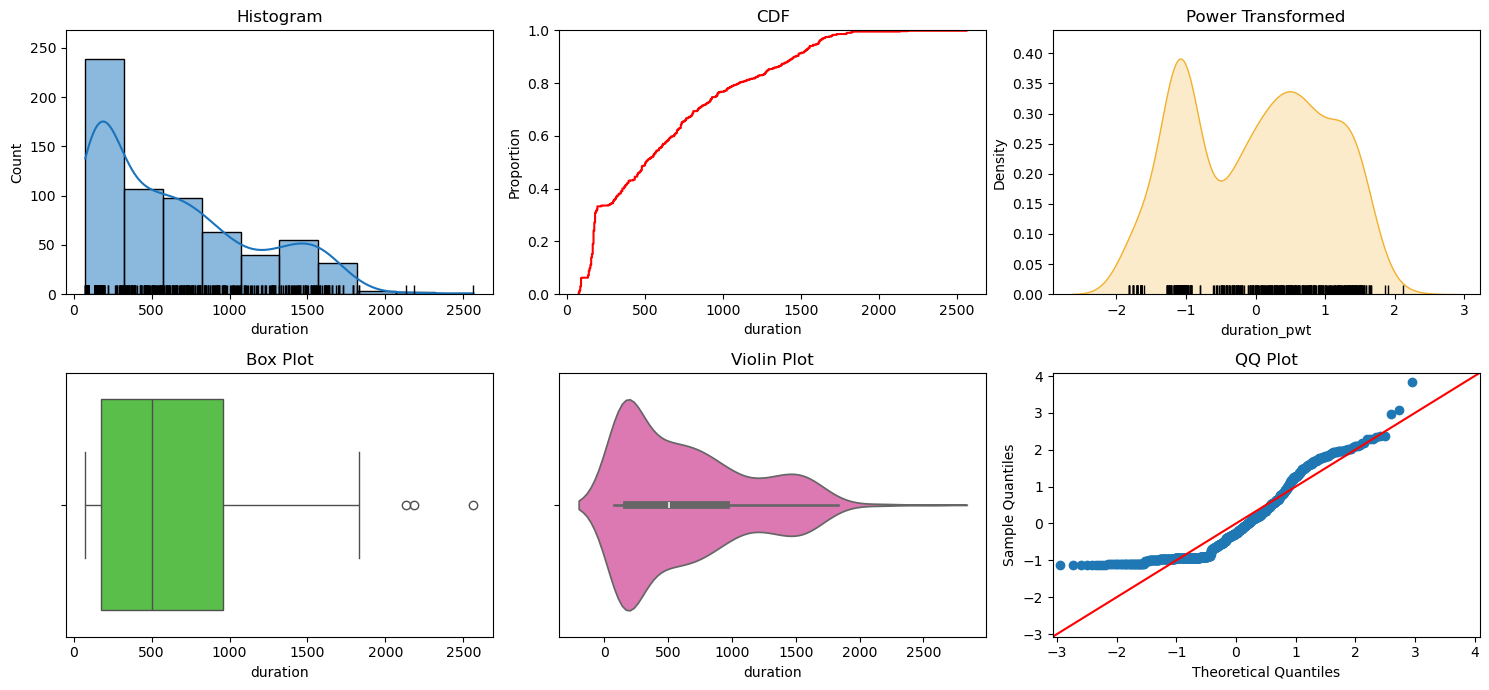

In [48]:
eda_helper_functions.num_univar_plots(train,"duration")

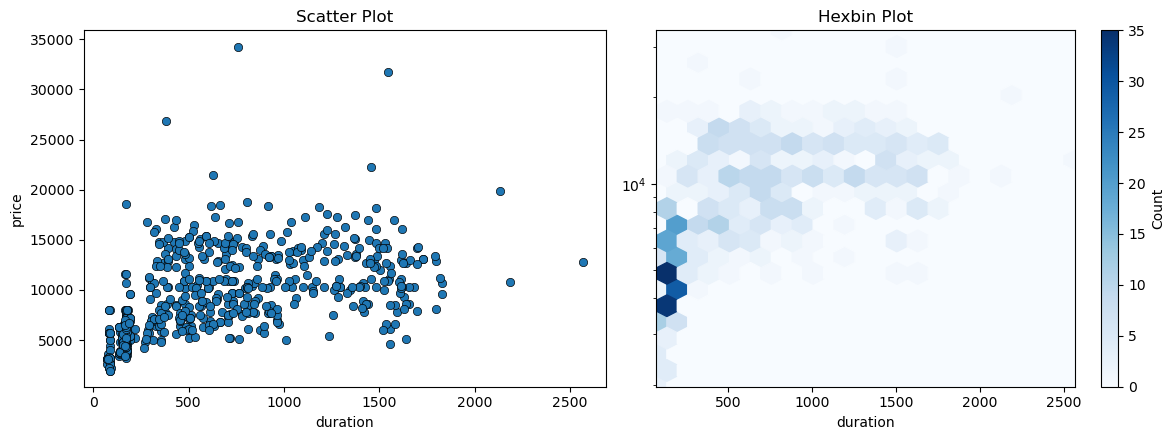

In [49]:
eda_helper_functions.num_bivar_plots(
    train,
    "duration",
    "price",
    hexbin_kwargs=dict(
        yscale="log",
        gridsize=20,
        cmap="Blues"
    )
)

In [50]:
eda_helper_functions.num_num_hyp_testing(train,"price","duration")

- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.5542220697543214
- p-value              : 8.23474003080503e-53
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and duration are correlated


- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.7020165273730767
- p-value              : 3.95425514241397e-96
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and duration are correlated


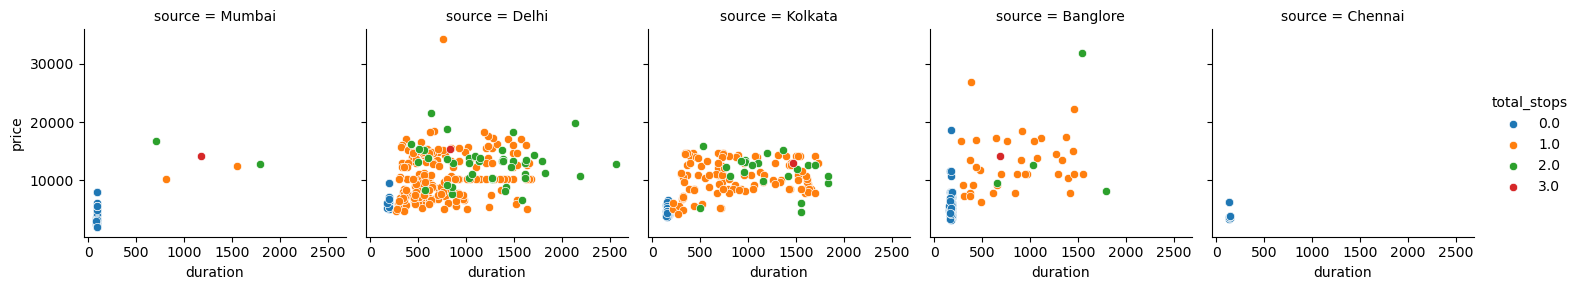

In [51]:
duration_grid=sns.FacetGrid(
    data=train,
    col="source",
    hue="total_stops",
    sharey=True
)
duration_grid.map(sns.scatterplot,"duration","price")
duration_grid.add_legend()

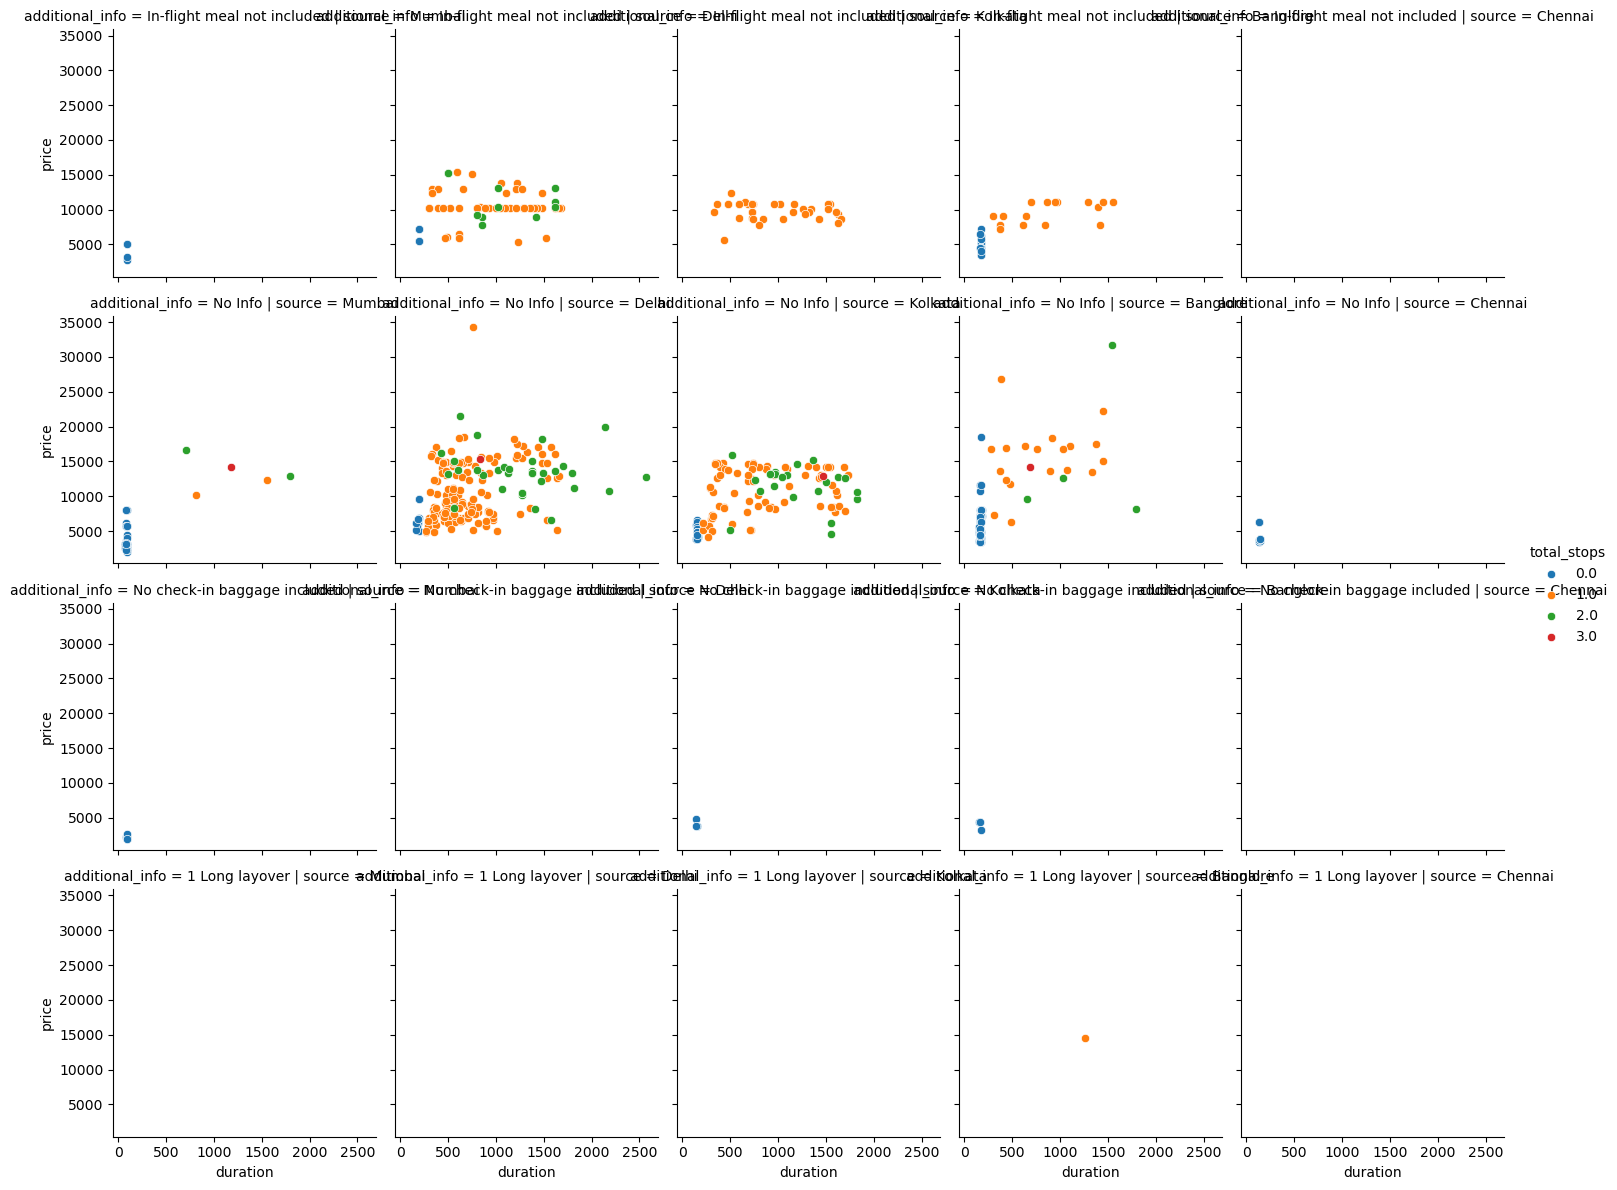

In [52]:
duration_grid=sns.FacetGrid(
    data=train,
    col="source",
    row="additional_info",
    hue="total_stops",
    sharey=True
)
duration_grid.map(sns.scatterplot,"duration","price")
duration_grid.add_legend()

In [53]:
eda_helper_functions.get_iqr_outliers(train,"duration")

Lower Limit : -996.875
Upper Limit : 2128.125


,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
377,Jet Airways,2019-06-03,Delhi,Cochin,2026-02-24 16:50:00,2026-02-24 04:25:00,2135,2.0,No Info,19907
294,Air India,2019-03-21,Delhi,Cochin,2026-02-24 06:50:00,2026-02-24 19:15:00,2185,2.0,No Info,10756
284,Jet Airways,2019-03-21,Delhi,Cochin,2026-02-24 09:40:00,2026-02-24 04:25:00,2565,2.0,No Info,12819


## additioanl_info

In [54]:
eda_helper_functions.cat_summary(train,"additional_info")

0      In-flight meal not included
1                          No Info
2                          No Info
3                          No Info
4                          No Info
                  ...             
635                        No Info
636                        No Info
637                        No Info
638                        No Info
639    In-flight meal not included
Name: additional_info, Length: 640, dtype: str

Data Type      : str
Cardinality    : 4 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 640 / 640 rows


,
count,640
unique,4
top,No Info
freq,488


,count,percentage
category,,
No Info,488,0.762500
In-flight meal not included,136,0.212500
No check-in baggage included,15,0.023438
1 Long layover,1,0.001563


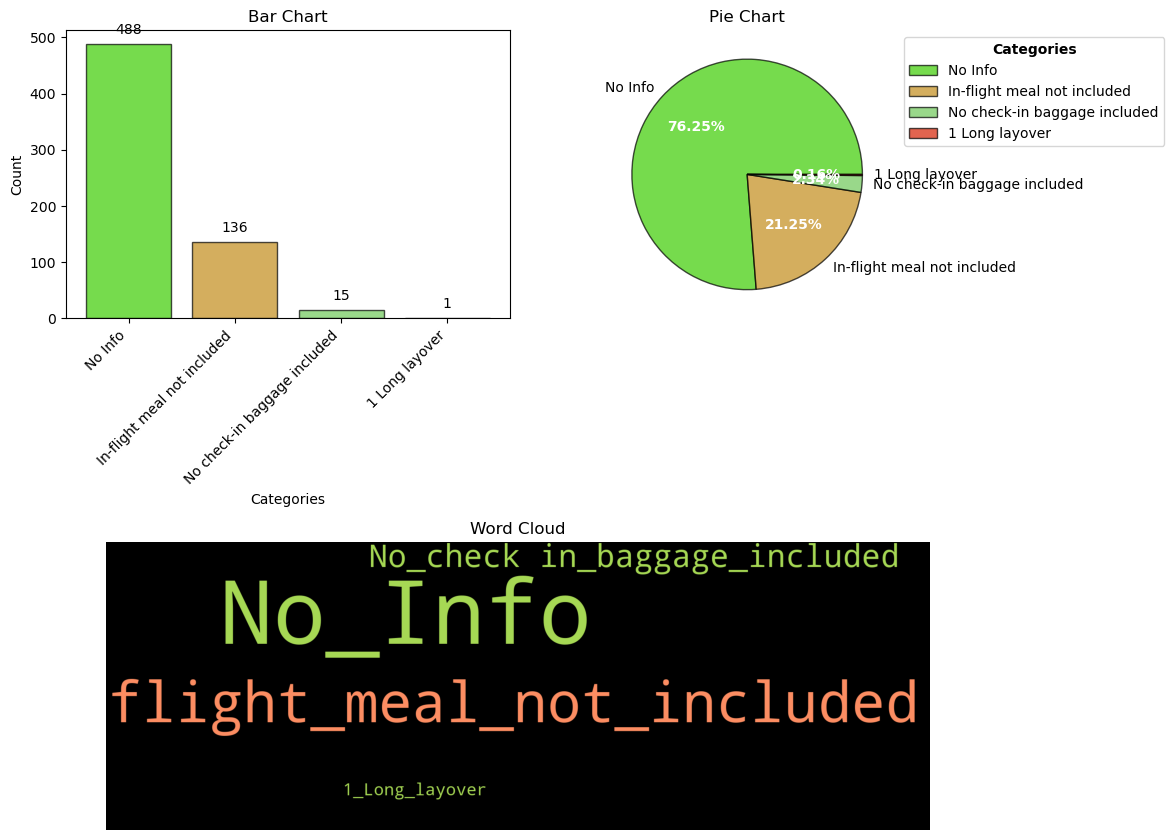

In [55]:
eda_helper_functions.cat_univar_plots(train,"additional_info")

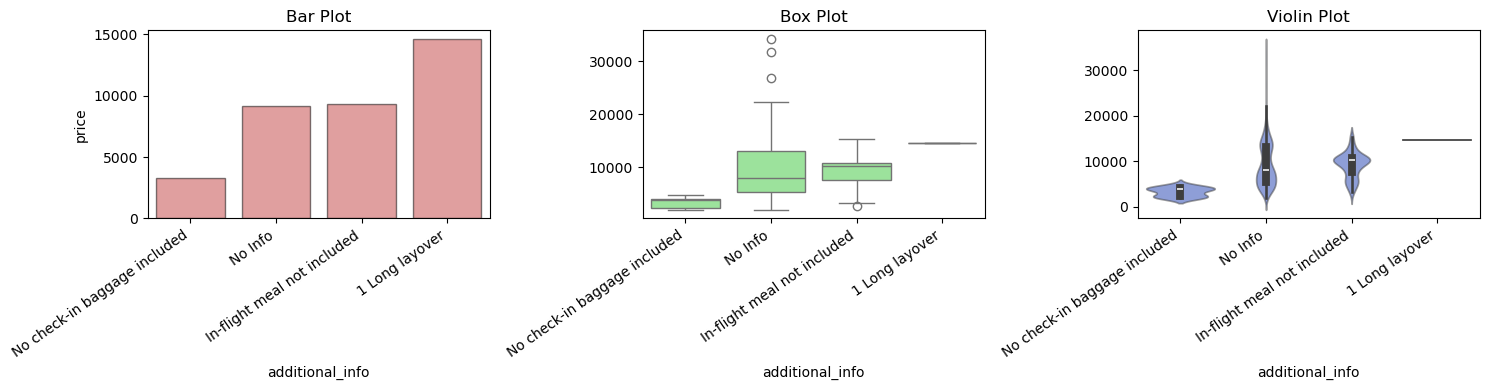

In [56]:
eda_helper_functions.num_cat_bivar_plots(train,"price","additional_info")

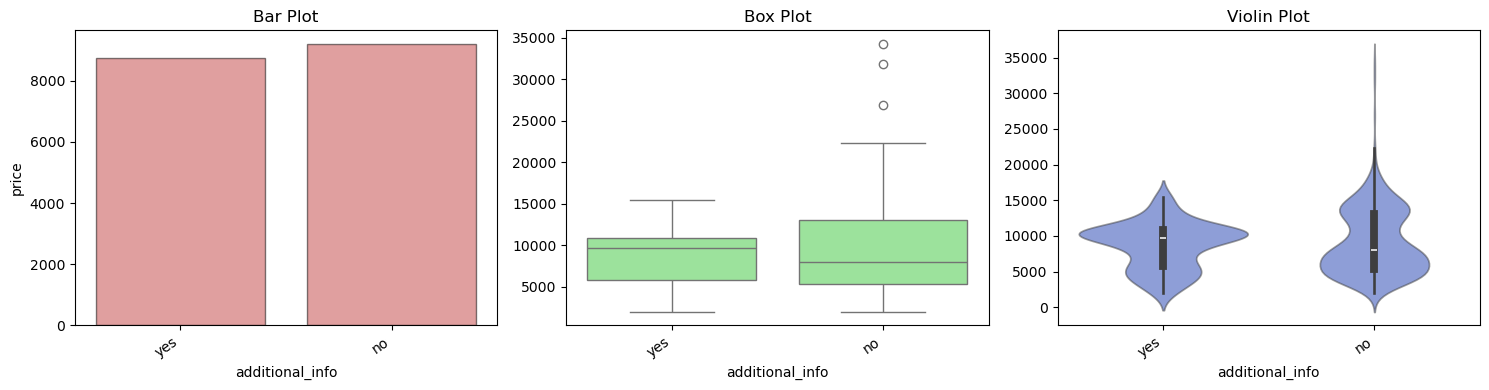

In [57]:
# convertion additional_info into a binary feature for analysis
(
    train
    .assign(additional_info=(
        train
        .additional_info
        .pipe(lambda ser: np.where(ser.eq("No Info"),"no","yes"))
    ))
    .pipe(eda_helper_functions.num_cat_bivar_plots,"price","additional_info")
)

## Automated EDA

In [ ]:
#from ydata_profiling import ProfileReport

In [ ]:
#report=ProfileReport(train)

In [ ]:
#report.to_file(output_file="output.html")